## Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

## Data preprocessing

In [3]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

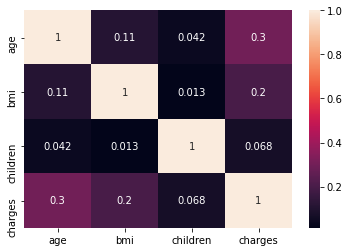

In [7]:
sns.heatmap(data.corr(),annot=True)

In [8]:
data.drop_duplicates(inplace=True)
data.shape

(1337, 7)

In [9]:
data.drop(['region'],axis=1,inplace=True)
data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [10]:
a=pd.get_dummies(data['sex'],drop_first=True)
a.columns=['Sex']
a.head()

,Sex
0,0
1,1
2,1
3,1
4,1


In [11]:
b=pd.get_dummies(data['smoker'],drop_first=True)
b.columns=['Smoker']
b.head()

,Smoker
0,1
1,0
2,0
3,0
4,0


In [12]:
data=pd.concat([data,a,b],axis=1)
data.head()

,age,sex,bmi,children,smoker,charges,Sex,Smoker
0,19,female,27.900,0,yes,16884.92400,0,1
1,18,male,33.770,1,no,1725.55230,1,0
2,28,male,33.000,3,no,4449.46200,1,0
3,33,male,22.705,0,no,21984.47061,1,0
4,32,male,28.880,0,no,3866.85520,1,0


In [13]:
data.drop(['sex','smoker'],inplace=True,axis=1)
data.head()

,age,bmi,children,charges,Sex,Smoker
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


In [14]:
X=data.drop('charges',axis=1)
y=data['charges']
X.shape,y.shape

((1337, 5), (1337,))

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Model Building 

### Linear Regrssion

In [16]:
linear_regresor=LinearRegression()
linear_regresor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred1=linear_regresor.predict(X_test)
mse1=mean_squared_error(y_test,y_pred1)
score1=r2_score(y_test,y_pred1)
mse1,score1

(43742718.220478095, 0.70769805837205)

###Random Forest

In [18]:
random_regressor=RandomForestRegressor()
random_regressor.fit(X_train,y_train)
y_pred2=random_regressor.predict(X_test)

/home/prattay/.local/lib/python3.8/site-packages/sklearn/ensemble/forest.py:244: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  warn("The default value of n_estimators will change from "


In [19]:
mse2=mean_squared_error(y_test,y_pred2)
score2=r2_score(y_test,y_pred2)
mse2,score2

(31706692.545132987, 0.788126386046031)

## Params tuning of the best model till now

In [22]:
n_estimators=[50,70,90,100,120,150,175,200]
max_features=['auto','sqrt']
max_depth=[2,4,6,8,10]
min_samples_split=[2,5,7]
bootstrap=[True,False]
params_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'bootstrap':bootstrap
}

In [23]:
mymodel=RandomForestRegressor()

In [24]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=mymodel,param_grid=params_grid,cv=5,verbose=2,n_jobs=4)
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    9.9s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   21.8s
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:   42.2s
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 2400 out of 2400 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=4,
             param_grid={'bootstrap': [True, False],
      

In [25]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 200}

In [26]:
y_predict=rf_grid.predict(X_test)
mean_squared_error(y_test,y_predict),r2_score(y_test,y_predict)

(27604691.30054361, 0.8155371866805563)

## Model saving

In [27]:
import pickle
pickle.dump(rf_grid,open('mymodel.pkl','wb'))

Or

In [28]:
import joblib
joblib.dump(rf_grid,'model.pkl')

['model.pkl']